### Libraries

In [54]:
import pickle
import gzip
import copy
import numpy as np # used for matrix operatyions 
np.set_printoptions(threshold=np.inf)
import random
from tqdm import tqdm_notebook 
from sklearn.cluster import KMeans # library for calculating clusters
import math # for implementing mathematical operations 
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from PIL import Image
import os
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 

#### Load MNIST Data on Python

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

### Load USPS Data on Python

In [405]:
import cv2
USPSMat  = []
USPSTar  = []
curPath  = 'Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r') 
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

#### Data Pre-processing of USPS Data set

In [4]:
U_Target=copy.deepcopy(USPSTar)
U_feature=copy.deepcopy(USPSMat)

#### Data Pre-processing of MNIST Data set

In [5]:
T_features, T_target = training_data
V_features, V_target = validation_data
Te_features, Te_target = test_data
print('Training Features  :',T_features.shape)
print('Training Target    :',T_target.shape)
print('Validation Features:',V_features.shape)
print('Validation Target  :',V_target.shape)
print('Test Features      :',Te_features.shape)
print('Test Target        :',Te_target.shape)

Training Features  : (50000, 784)
Training Target    : (50000,)
Validation Features: (10000, 784)
Validation Target  : (10000,)
Test Features      : (10000, 784)
Test Target        : (10000,)


## Logistic Regression

#### Functions 

In [107]:
def sigmoid(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
def one_hot_encode(x, n_classes):
    return np.eye(n_classes)[x]
def gradientdescent_L(features,target,learningrate,W,epoch):
    print('Training Process Started ..')
    losses =[]
    for y in tqdm_notebook(range(0,epoch)):
        z = np.asarray(np.dot(features,W))
        h = sigmoid(z)
        gradient = np.dot(np.transpose(features),(h-target))/target.shape[0]
        W -= learningrate * gradient
        loss = (-target * np.log(h) - (1 - target) * np.log(1 - h)).mean()
        losses.append(loss)
        plt.plot(losses)
    print('Training Process Completed') 
    
    return W,loss
def predict_prob(X,weights):
    return sigmoid(np.dot(X, weights))
    
def predict(features,weights,threshold):
    predictval = predict_prob(features,weights)
    predictval = np.argmax(predictval,axis=1)
    return predictval
def accuracy(target,predicted):
    #print(target)
    #print(predicted)
    if(len(target)==len(predicted)):
        correct =[]
        wrong =[]
        n_classes = len(np.unique(target))
        conf_matrix = np.zeros((n_classes,n_classes))
        print('Starting Evaluation..')
        for i in tqdm_notebook(range(0,len(predicted))):
            if (predicted[i]==target[i]):
                correct.append(i)
                #print('predicted correctly',predicted[i])
            else:
                wrong.append(i)
                #print('predicted worngly:',predicted[i])
                #print('target actual:',target[i])
            conf_matrix[target[i]][predicted[i]] +=  1
    else:
        print('error')
    #print(len(correct))
    #print(len(wrong))
    #print(len(target))
    accuracy = (len(correct)/len(target))*100
    #print(conf_matrix.astype(int))
    return accuracy,correct,wrong,conf_matrix


#### Hyperparameters for Logistic Regression

In [148]:
learningRate = 0.05
threshold =0.6
epoch = 900

#### Main Loop for Logistic Regression 

(50000, 784) Features
(50000, 10) Target
Training Process Started ..


Training Process Completed
Training Process Started ..


Training Process Completed


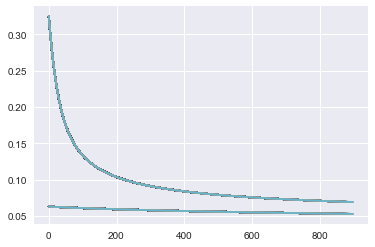

In [149]:
Features = T_features #,HVFS,HTEFS
print(Features.shape,'Features')
Target = one_hot_encode(T_target,10) #HTRTS,HVTS,HTETS
print(Target.shape,'Target')
#print(Target)
#print(Features.shape[1])
#print(Target.shape[1])
Val_features = copy.deepcopy(V_features)
Val_target   = copy.deepcopy(V_target)
Val_target   = one_hot_encode(Val_target,10)
Tes_features=  copy.deepcopy(Te_features)
Tes_target  =  copy.deepcopy(Te_target)
#Tes_target  =one_hot_encode(Tes_target,10)
W=[]
W = np.zeros([Features.shape[1],Target.shape[1]])

w,hclt =gradientdescent_L(Features,Target,learningRate,W,epoch)

vw,hclv = gradientdescent_L(Val_features,Val_target,learningRate,w,epoch)

LRM_predictval = predict(Tes_features,vw,threshold)



### Testing the Mnist Data set

In [157]:
acc,co,wr,confusion_mat = accuracy(Te_target,LRM_predictval)

Starting Evaluation..


####  Accuracy and Confusion Matrix For MNIST Dataset

========UBID========
======manishre======
====personNumber====
======50289714======
Loss for training set 0.06915787942266446
Loss for validation set 0.052854987152375216
Accuracy is:90.22%
Confusion Matrix for MNIST Dataset:


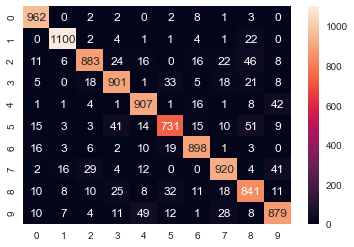

In [162]:
print("========UBID========")
print("======manishre======")
print("====personNumber====")
print("======50289714======")
print('Loss for training set',hclt)
print('Loss for validation set',hclv)
print('Accuracy is:'+str((acc))+'%')
print('Confusion Matrix for MNIST Dataset:')
import seaborn as sns; sns.set()
ax = sns.heatmap(confusion_mat.astype(int), annot=True,fmt="d")

In [440]:
print(confusion_mat.astype(int))

[[ 962    0    2    2    0    2    8    1    3    0]
 [   0 1100    2    4    1    1    4    1   22    0]
 [  11    6  883   24   16    0   16   22   46    8]
 [   5    0   18  901    1   33    5   18   21    8]
 [   1    1    4    1  907    1   16    1    8   42]
 [  15    3    3   41   14  731   15   10   51    9]
 [  16    3    6    2   10   19  898    1    3    0]
 [   2   16   29    4   12    0    0  920    4   41]
 [  10    8   10   25    8   32   11   18  841   11]
 [  10    7    4   11   49   12    1   28    8  879]]


#### USPS DATASET Accuracy ans Confusion Matrix

Starting Evaluation..


Accuracy is:35.73678683934197%
Confusion Matrix for USPS Dataset:


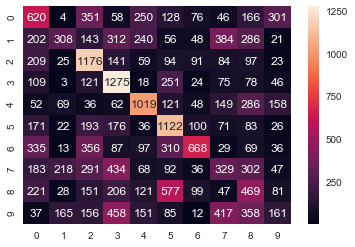

In [163]:
#U_Target,U_feature
LRU_predictval = predict(U_feature,vw,threshold)
U_acc,u_co,U_wr,U_confusion_mat = accuracy(U_Target,LRU_predictval)
import seaborn as sns; sns.set()
ax = sns.heatmap(U_confusion_mat.astype(int), annot=True,fmt="d")
print('Accuracy is:'+str((U_acc))+'%')
print('Confusion Matrix for USPS Dataset:')

In [441]:
print(U_confusion_mat.astype(int))

[[ 620    4  351   58  250  128   76   46  166  301]
 [ 202  308  143  312  240   56   48  384  286   21]
 [ 209   25 1176  141   59   94   91   84   97   23]
 [ 109    3  121 1275   18  251   24   75   78   46]
 [  52   69   36   62 1019  121   48  149  286  158]
 [ 171   22  193  176   36 1122  100   71   83   26]
 [ 335   13  356   87   97  310  668   29   69   36]
 [ 183  218  291  434   68   92   36  329  302   47]
 [ 221   28  151  206  121  577   99   47  469   81]
 [  37  165  156  458  151   85   12  417  358  161]]


### Neural Network 

#### Functions

In [164]:
from keras.layers import Conv2D, MaxPooling2D
def one_hot_encode(x, n_classes):
    return np.eye(n_classes)[x]

def PreprocessingN(DataSet,trp,vp,C):
    if(C=='F'):
        TR_Len = int(math.ceil(len(DataSet)*(trp*0.01)))
        training= DataSet[:TR_Len] 
        V_Len = int(math.ceil(len(DataSet)*(vp*0.01))) 
        V_End = len(training) + V_Len
        validation = DataSet[(TR_Len+1):V_End,::]
    else:
        TR_Len = int(math.ceil(len(DataSet)*(trp*0.01))) 
        training= DataSet[:TR_Len] 
        V_Len = int(math.ceil(len(DataSet)*(vp*0.01))) 
        V_End = len(training) + V_Len
        validation = DataSet[(TR_Len+1):V_End]
    return (training,validation)


def get_model(x1):
    print(x1)
    input_size = x1
    drop_out = 0.2
    first_dense_layer_nodes  = 800
    second_dense_layer_nodes = 10
    model = Sequential() 
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))

    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    model.summary()
    
   
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


def runModel(processedData,processedLabel,validation_split,epochs,tb_batch_size,model_batch_size,early_patience):
    
    tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
    earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


    history = model.fit(processedData
                        , processedLabel
                        , validation_split=validation_data_split
                        , epochs=num_epochs
                        , batch_size=model_batch_size
                        , callbacks = [tensorboard_cb,earlystopping_cb]
                       )
    return history

### Data pre-processing

#### MNIST Dataset

In [165]:
Nt_features  = copy.deepcopy(T_features)
Nv_features  = copy.deepcopy(V_features)
Nte_features = copy.deepcopy(Te_features)
Nt_target  = copy.deepcopy(T_target)
Nv_target  = copy.deepcopy(V_target)
Nte_target = copy.deepcopy(Te_target)
training_target   = one_hot_encode(Nt_target,10)
validation_target = one_hot_encode(Nv_target,10)
testing_target    = one_hot_encode(Nte_target,10)

In [166]:
print('Training Features   :',Nt_features.shape)
print('Validation Features :',Nv_features.shape)
print('Testing Features    :',Nte_features.shape)
print('Training Target     :',training_target.shape)
print('validation Traget   :',validation_target.shape)
print('testing Target      :',testing_target.shape)

Training Features   : (50000, 784)
Validation Features : (10000, 784)
Testing Features    : (10000, 784)
Training Target     : (50000, 10)
validation Traget   : (10000, 10)
testing Target      : (10000, 10)


#### USPS Dataset

In [167]:
NU_Target=copy.deepcopy(USPSTar)
NU_Target =one_hot_encode(NU_Target,10)
NU_feature=copy.deepcopy(np.matrix(USPSMat))

In [168]:
print('USPS Dataset Testing Features :',NU_feature.shape)
print('USPS Dataset Testing Target   :',NU_Target.shape)

USPS Dataset Testing Features : (19999, 784)
USPS Dataset Testing Target   : (19999, 10)


## Hyper Parametes

In [169]:
testing_percent =10
validation_data_split = 0.2
num_epochs = 500
model_batch_size = 20000
tb_batch_size = 5000
early_patience = 100


#### Get Model

In [170]:
model = get_model(len(np.transpose(Nt_features)))

784
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
activation_1 (Activation)    (None, 800)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


##### Run Model

In [171]:
#Nt_features ,Nv_features ,Nte_features ,training_target ,validation_target ,testing_target   
history = runModel(processedData = Nt_features,
         processedLabel = training_target,
         validation_split = validation_data_split,
         epochs = num_epochs,
         tb_batch_size = tb_batch_size,
         model_batch_size = model_batch_size,
         early_patience = early_patience)

Train on 40000 samples, validate on 10000 samples
Epoch 1/500
40000/40000 [==============================] - ETA: 2s - loss: 2.3780 - acc: 0.097 - 4s 101us/step - loss: 2.2222 - acc: 0.2274 - val_loss: 1.7841 - val_acc: 0.6045
Epoch 2/500
40000/40000 [==============================] - ETA: 1s - loss: 1.7820 - acc: 0.555 - 4s 90us/step - loss: 1.6605 - acc: 0.6124 - val_loss: 1.3002 - val_acc: 0.7621
Epoch 3/500
40000/40000 [==============================] - ETA: 1s - loss: 1.2954 - acc: 0.746 - 4s 98us/step - loss: 1.2005 - acc: 0.7653 - val_loss: 0.9472 - val_acc: 0.8168
Epoch 4/500
40000/40000 [==============================] - ETA: 1s - loss: 0.9414 - acc: 0.807 - 4s 98us/step - loss: 0.8884 - acc: 0.8115 - val_loss: 0.7392 - val_acc: 0.8312
Epoch 5/500
40000/40000 [==============================] - ETA: 1s - loss: 0.7305 - acc: 0.829 - 4s 94us/step - loss: 0.7034 - acc: 0.8297 - val_loss: 0.6077 - val_acc: 0.8428
Epoch 6/500
40000/40000 [==============================] - ETA: 1s - 

Epoch 47/500
40000/40000 [==============================] - ETA: 2s - loss: 0.1523 - acc: 0.957 - 4s 106us/step - loss: 0.1493 - acc: 0.9588 - val_loss: 0.1819 - val_acc: 0.9471
Epoch 48/500
40000/40000 [==============================] - ETA: 1s - loss: 0.1493 - acc: 0.958 - 4s 102us/step - loss: 0.1465 - acc: 0.9591 - val_loss: 0.1800 - val_acc: 0.9479
Epoch 49/500
40000/40000 [==============================] - ETA: 1s - loss: 0.1390 - acc: 0.962 - 5s 113us/step - loss: 0.1443 - acc: 0.9601 - val_loss: 0.1783 - val_acc: 0.9486
Epoch 50/500
40000/40000 [==============================] - ETA: 1s - loss: 0.1474 - acc: 0.958 - 4s 106us/step - loss: 0.1419 - acc: 0.9603 - val_loss: 0.1760 - val_acc: 0.9490
Epoch 51/500
40000/40000 [==============================] - ETA: 2s - loss: 0.1391 - acc: 0.961 - 5s 115us/step - loss: 0.1388 - acc: 0.9608 - val_loss: 0.1740 - val_acc: 0.9492
Epoch 52/500
40000/40000 [==============================] - ETA: 1s - loss: 0.1330 - acc: 0.962 - 4s 98us/step

Epoch 139/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0388 - acc: 0.990 - 4s 109us/step - loss: 0.0407 - acc: 0.9897 - val_loss: 0.1079 - val_acc: 0.9678
Epoch 140/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0389 - acc: 0.990 - 4s 102us/step - loss: 0.0395 - acc: 0.9907 - val_loss: 0.1075 - val_acc: 0.9675
Epoch 141/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0394 - acc: 0.990 - 4s 104us/step - loss: 0.0394 - acc: 0.9907 - val_loss: 0.1071 - val_acc: 0.9671
Epoch 142/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0394 - acc: 0.990 - 4s 98us/step - loss: 0.0387 - acc: 0.9906 - val_loss: 0.1069 - val_acc: 0.9678
Epoch 143/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0394 - acc: 0.989 - 4s 100us/step - loss: 0.0391 - acc: 0.9898 - val_loss: 0.1068 - val_acc: 0.9681
Epoch 144/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0377 - acc: 0.990 - 4s 94us

Epoch 185/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0248 - acc: 0.995 - 6s 148us/step - loss: 0.0252 - acc: 0.9948 - val_loss: 0.1011 - val_acc: 0.9705
Epoch 186/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0249 - acc: 0.994 - 6s 138us/step - loss: 0.0243 - acc: 0.9951 - val_loss: 0.1010 - val_acc: 0.9703
Epoch 187/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0258 - acc: 0.994 - 5s 132us/step - loss: 0.0248 - acc: 0.9947 - val_loss: 0.1008 - val_acc: 0.9704
Epoch 188/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0247 - acc: 0.994 - 5s 117us/step - loss: 0.0239 - acc: 0.9952 - val_loss: 0.1006 - val_acc: 0.9705
Epoch 189/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0243 - acc: 0.995 - 4s 110us/step - loss: 0.0245 - acc: 0.9953 - val_loss: 0.1006 - val_acc: 0.9703
Epoch 190/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0233 - acc: 0.995 - 5s 130

Epoch 231/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0168 - acc: 0.997 - 5s 115us/step - loss: 0.0164 - acc: 0.9973 - val_loss: 0.0992 - val_acc: 0.9713
Epoch 232/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0163 - acc: 0.996 - 4s 111us/step - loss: 0.0163 - acc: 0.9970 - val_loss: 0.0992 - val_acc: 0.9710
Epoch 233/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0157 - acc: 0.997 - 4s 96us/step - loss: 0.0162 - acc: 0.9971 - val_loss: 0.0990 - val_acc: 0.9715
Epoch 234/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0149 - acc: 0.997 - 4s 93us/step - loss: 0.0157 - acc: 0.9973 - val_loss: 0.0987 - val_acc: 0.9718
Epoch 235/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0154 - acc: 0.997 - 4s 103us/step - loss: 0.0159 - acc: 0.9971 - val_loss: 0.0985 - val_acc: 0.9718
Epoch 236/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0160 - acc: 0.997 - 4s 107us

Epoch 277/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0117 - acc: 0.998 - 4s 108us/step - loss: 0.0116 - acc: 0.9983 - val_loss: 0.0994 - val_acc: 0.9718
Epoch 278/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0111 - acc: 0.998 - 4s 108us/step - loss: 0.0114 - acc: 0.9984 - val_loss: 0.0994 - val_acc: 0.9724
Epoch 279/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0116 - acc: 0.998 - 4s 110us/step - loss: 0.0120 - acc: 0.9981 - val_loss: 0.0991 - val_acc: 0.9724
Epoch 280/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0118 - acc: 0.998 - 5s 115us/step - loss: 0.0115 - acc: 0.9983 - val_loss: 0.0987 - val_acc: 0.9725
Epoch 281/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0113 - acc: 0.998 - 4s 104us/step - loss: 0.0112 - acc: 0.9983 - val_loss: 0.0989 - val_acc: 0.9722
Epoch 282/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0107 - acc: 0.998 - 5s 113

Epoch 323/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0086 - acc: 0.998 - 5s 115us/step - loss: 0.0084 - acc: 0.9989 - val_loss: 0.0999 - val_acc: 0.9728
Epoch 324/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0082 - acc: 0.999 - 4s 112us/step - loss: 0.0084 - acc: 0.9991 - val_loss: 0.1000 - val_acc: 0.9731
Epoch 325/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0084 - acc: 0.999 - 4s 109us/step - loss: 0.0080 - acc: 0.9992 - val_loss: 0.1003 - val_acc: 0.9726
Epoch 326/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0083 - acc: 0.999 - 4s 112us/step - loss: 0.0084 - acc: 0.9989 - val_loss: 0.1005 - val_acc: 0.9728
Epoch 327/500
40000/40000 [==============================] - ETA: 1s - loss: 0.0080 - acc: 0.999 - 5s 113us/step - loss: 0.0079 - acc: 0.9992 - val_loss: 0.1003 - val_acc: 0.9723
Epoch 328/500
40000/40000 [==============================] - ETA: 2s - loss: 0.0077 - acc: 0.999 - 5s 125

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5B67133C8>,
      dtype=object)

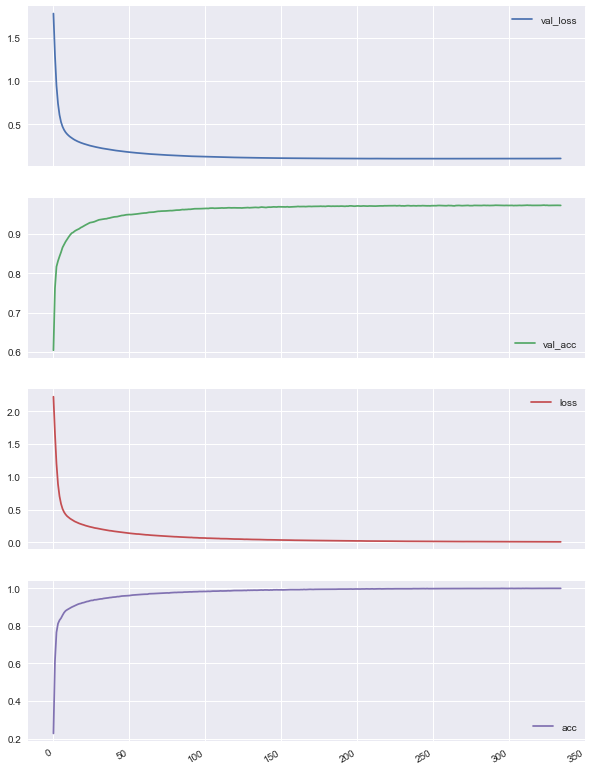

In [172]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [176]:
def decode(val):
    return np.argmax(val)
def confusion_Matrix_NN(predict_c,testing_target1):
    decode_p =[]
    decode_y =[]
    for i in range(len(predict_c)):
        decode_p.append(decode(predict_c[i]))
        decode_y.append(decode(testing_target1[i]))
    conf_matrix_cnn = np.zeros((10,10))
    #print(conf_matrix_cnn)
    for i in range(0,(predict_c.shape[0])):
        conf_matrix_cnn[decode_y[i]][decode_p[i]] +=  1
    return conf_matrix_cnn

#### Testing for MNIST Dataset

(10000, 10)
========UBID========
======manishre======
====personNumber====
======50289714======
Test Loss: 0.07109511991865583
Test Accuracy: 97.92
Confusion Matrix for MNIST DATASET:


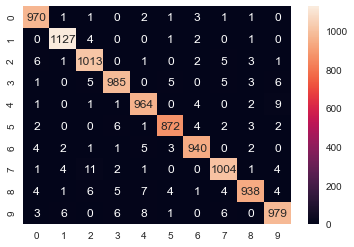

In [292]:
predict_NN = model.predict(Nte_features)
print(predict_NN.shape)
M_conf_matrix_NN = confusion_Matrix_NN(predict_NN,testing_target) 
accuracy_HC = model.evaluate(Nte_features,testing_target,verbose=0)
print("========UBID========")
print("======manishre======")
print("====personNumber====")
print("======50289714======")
print("Test Loss:",accuracy_HC[0])
print("Test Accuracy:",accuracy_HC[1]*100)
opdf = pd.DataFrame(accuracy_HC)
print('Confusion Matrix for MNIST DATASET:')
import seaborn as sns; sns.set()
ax = sns.heatmap(M_conf_matrix_NN.astype(int), annot=True,fmt="d")

#### Testing of USPS Dtaset

========UBID========
======manishre======
====personNumber====
======50289714======
Test Loss: 4.985729608269201
Test Accuracy: 39.44197209845591
Confusion Matrix for USPS DATASET:


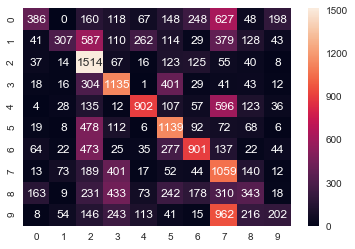

In [433]:
U_predict_NN = model.predict(NU_feature)
U_conf_matrix_NN = confusion_Matrix_NN(U_predict_NN,NU_Target) 
accuracy_U = model.evaluate(NU_feature,NU_Target,verbose=0)
print("========UBID========")
print("======manishre======")
print("====personNumber====")
print("======50289714======")
print("Test Loss:",accuracy_U[0])
print("Test Accuracy:",accuracy_U[1]*100)
print('Confusion Matrix for USPS DATASET:')
import seaborn as sns; sns.set()
ax = sns.heatmap(U_conf_matrix_NN.astype(int), annot=True,fmt="d")

## CNN

In [184]:
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D
def getModel_CNN():
    #create model
    model1 = Sequential()
    #add model layers
    model1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model1.add(Conv2D(32, kernel_size=3, activation='relu'))
    model1.add(MaxPool2D(pool_size=(2,2)))
    model1.add(Flatten())
    model1.add(Dropout(0.25))
    model1.add(Dense(10, activation='softmax'))
    model1.summary()
    model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model1
def runModel_CNN(processedData,processedLabel,validation_split,epochs,model_batch_size):
    
    
    history = model1.fit(processedData
                        , processedLabel
                        , validation_split=validation_data_split
                        , epochs=num_epochs
                        , batch_size=model_batch_size
                        , verbose =0
                       )
    return history

In [189]:
CNNt_features  = copy.deepcopy(T_features)
CNNv_features  = copy.deepcopy(V_features)
#CNNt_features = np.concatenate([CNNt_features,CNNv_features],axis=0)
CNNte_features = copy.deepcopy(Te_features)
CNNt_target  = copy.deepcopy(T_target)
CNNv_target  = copy.deepcopy(V_target)
#CNNt_target  = np.concatenate([CNNt_target,CNNv_target],axis=0)
CNNte_target = copy.deepcopy(Te_target)
training_target   = one_hot_encode(CNNt_target,10)
testing_target    = one_hot_encode(CNNte_target,10)
###########################################################################
print('CNNt_features    :',CNNt_features.shape)
print('traininng target :',training_target.shape)
print('CNNte_testing    :',CNNte_features.shape)
print('testing target   :',testing_target.shape)

CNNt_features    : (50000, 784)
traininng target : (50000, 10)
CNNte_testing    : (10000, 784)
testing target   : (10000, 10)


In [394]:
CNNU_Target=copy.deepcopy(USPSTar)
CNNU_Target =one_hot_encode(CNNU_Target,10)
CNNU_feature=copy.deepcopy(np.matrix(USPSMat))
print('USPS Dataset Testing Features :',CNNU_feature.shape)
print('USPS Dataset Testing Target   :',CNNU_Target.shape)

USPS Dataset Testing Features : (19999, 784)
USPS Dataset Testing Target   : (19999, 10)


In [ ]:
CNNt_features  = CNNt_features.reshape(50000,28,28,1)
CNNte_features = CNNte_features.reshape(10000,28,28,1)
from keras.utils import to_categorical


In [191]:
model1 = getModel_CNN()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
_________________________________________________________________


In [194]:
#compile model using accuracy to measure model performance
history1 = model1.fit(CNNt_features, training_target,epochs=1,verbose =1)


Epoch 1/1


 6528/50000 [==>...........................] - ETA: 4:59 - loss: 0.0222 - acc: 1.000 - ETA: 5:21 - loss: 0.0919 - acc: 0.968 - ETA: 5:10 - loss: 0.0668 - acc: 0.979 - ETA: 5:32 - loss: 0.0546 - acc: 0.984 - ETA: 5:55 - loss: 0.0450 - acc: 0.987 - ETA: 6:00 - loss: 0.0389 - acc: 0.989 - ETA: 5:55 - loss: 0.0349 - acc: 0.991 - ETA: 6:04 - loss: 0.0487 - acc: 0.984 - ETA: 5:58 - loss: 0.0457 - acc: 0.986 - ETA: 5:59 - loss: 0.0436 - acc: 0.987 - ETA: 5:54 - loss: 0.0626 - acc: 0.980 - ETA: 6:34 - loss: 0.0576 - acc: 0.981 - ETA: 6:54 - loss: 0.0572 - acc: 0.983 - ETA: 6:51 - loss: 0.0547 - acc: 0.984 - ETA: 6:55 - loss: 0.0538 - acc: 0.985 - ETA: 6:57 - loss: 0.0556 - acc: 0.984 - ETA: 6:54 - loss: 0.0526 - acc: 0.985 - ETA: 6:53 - loss: 0.0645 - acc: 0.980 - ETA: 7:04 - loss: 0.0621 - acc: 0.981 - ETA: 7:09 - loss: 0.0674 - acc: 0.979 - ETA: 7:14 - loss: 0.0649 - acc: 0.980 - ETA: 7:23 - loss: 0.0668 - acc: 0.980 - ETA: 7:28 - loss: 0.0643 - acc: 0.981 - ETA: 7:30 - loss: 0.0639 - acc: 0

19584/50000 [==========>...................] - ETA: 4:54 - loss: 0.0585 - acc: 0.981 - ETA: 4:54 - loss: 0.0584 - acc: 0.981 - ETA: 4:53 - loss: 0.0585 - acc: 0.981 - ETA: 4:53 - loss: 0.0585 - acc: 0.981 - ETA: 4:52 - loss: 0.0584 - acc: 0.981 - ETA: 4:52 - loss: 0.0583 - acc: 0.981 - ETA: 4:52 - loss: 0.0582 - acc: 0.981 - ETA: 4:51 - loss: 0.0585 - acc: 0.981 - ETA: 4:51 - loss: 0.0585 - acc: 0.981 - ETA: 4:51 - loss: 0.0586 - acc: 0.981 - ETA: 4:50 - loss: 0.0585 - acc: 0.981 - ETA: 4:50 - loss: 0.0584 - acc: 0.981 - ETA: 4:50 - loss: 0.0582 - acc: 0.981 - ETA: 4:49 - loss: 0.0581 - acc: 0.981 - ETA: 4:49 - loss: 0.0581 - acc: 0.981 - ETA: 4:49 - loss: 0.0580 - acc: 0.981 - ETA: 4:48 - loss: 0.0579 - acc: 0.981 - ETA: 4:48 - loss: 0.0579 - acc: 0.981 - ETA: 4:47 - loss: 0.0579 - acc: 0.981 - ETA: 4:47 - loss: 0.0577 - acc: 0.981 - ETA: 4:47 - loss: 0.0576 - acc: 0.981 - ETA: 4:46 - loss: 0.0575 - acc: 0.982 - ETA: 4:46 - loss: 0.0578 - acc: 0.981 - ETA: 4:46 - loss: 0.0577 - acc: 0

26112/50000 [==============>...............] - ETA: 3:58 - loss: 0.0589 - acc: 0.981 - ETA: 3:57 - loss: 0.0589 - acc: 0.981 - ETA: 3:57 - loss: 0.0589 - acc: 0.981 - ETA: 3:57 - loss: 0.0589 - acc: 0.981 - ETA: 3:57 - loss: 0.0589 - acc: 0.981 - ETA: 3:56 - loss: 0.0588 - acc: 0.981 - ETA: 3:56 - loss: 0.0589 - acc: 0.981 - ETA: 3:56 - loss: 0.0593 - acc: 0.981 - ETA: 3:55 - loss: 0.0592 - acc: 0.981 - ETA: 3:55 - loss: 0.0591 - acc: 0.981 - ETA: 3:55 - loss: 0.0593 - acc: 0.981 - ETA: 3:54 - loss: 0.0592 - acc: 0.981 - ETA: 3:54 - loss: 0.0594 - acc: 0.981 - ETA: 3:54 - loss: 0.0593 - acc: 0.981 - ETA: 3:54 - loss: 0.0592 - acc: 0.981 - ETA: 3:53 - loss: 0.0593 - acc: 0.981 - ETA: 3:53 - loss: 0.0592 - acc: 0.981 - ETA: 3:53 - loss: 0.0592 - acc: 0.981 - ETA: 3:53 - loss: 0.0592 - acc: 0.981 - ETA: 3:52 - loss: 0.0592 - acc: 0.981 - ETA: 3:52 - loss: 0.0591 - acc: 0.981 - ETA: 3:52 - loss: 0.0591 - acc: 0.981 - ETA: 3:51 - loss: 0.0590 - acc: 0.981 - ETA: 3:51 - loss: 0.0589 - acc: 0

32640/50000 [==================>...........] - ETA: 3:01 - loss: 0.0594 - acc: 0.982 - ETA: 3:00 - loss: 0.0595 - acc: 0.982 - ETA: 3:00 - loss: 0.0595 - acc: 0.982 - ETA: 3:00 - loss: 0.0594 - acc: 0.982 - ETA: 2:59 - loss: 0.0594 - acc: 0.982 - ETA: 2:59 - loss: 0.0593 - acc: 0.982 - ETA: 2:59 - loss: 0.0597 - acc: 0.982 - ETA: 2:59 - loss: 0.0597 - acc: 0.981 - ETA: 2:58 - loss: 0.0597 - acc: 0.981 - ETA: 2:58 - loss: 0.0598 - acc: 0.981 - ETA: 2:58 - loss: 0.0599 - acc: 0.981 - ETA: 2:58 - loss: 0.0598 - acc: 0.981 - ETA: 2:57 - loss: 0.0598 - acc: 0.981 - ETA: 2:57 - loss: 0.0597 - acc: 0.982 - ETA: 2:57 - loss: 0.0597 - acc: 0.982 - ETA: 2:57 - loss: 0.0597 - acc: 0.981 - ETA: 2:56 - loss: 0.0597 - acc: 0.981 - ETA: 2:56 - loss: 0.0597 - acc: 0.981 - ETA: 2:56 - loss: 0.0598 - acc: 0.981 - ETA: 2:56 - loss: 0.0599 - acc: 0.981 - ETA: 2:56 - loss: 0.0600 - acc: 0.981 - ETA: 2:55 - loss: 0.0599 - acc: 0.981 - ETA: 2:55 - loss: 0.0599 - acc: 0.981 - ETA: 2:55 - loss: 0.0599 - acc: 0

39168/50000 [======================>.......] - ETA: 2:07 - loss: 0.0579 - acc: 0.982 - ETA: 2:07 - loss: 0.0579 - acc: 0.982 - ETA: 2:07 - loss: 0.0578 - acc: 0.982 - ETA: 2:06 - loss: 0.0578 - acc: 0.982 - ETA: 2:06 - loss: 0.0578 - acc: 0.982 - ETA: 2:06 - loss: 0.0577 - acc: 0.982 - ETA: 2:06 - loss: 0.0578 - acc: 0.982 - ETA: 2:05 - loss: 0.0577 - acc: 0.982 - ETA: 2:05 - loss: 0.0577 - acc: 0.982 - ETA: 2:05 - loss: 0.0577 - acc: 0.982 - ETA: 2:05 - loss: 0.0577 - acc: 0.982 - ETA: 2:04 - loss: 0.0577 - acc: 0.982 - ETA: 2:04 - loss: 0.0577 - acc: 0.982 - ETA: 2:04 - loss: 0.0577 - acc: 0.982 - ETA: 2:04 - loss: 0.0577 - acc: 0.982 - ETA: 2:03 - loss: 0.0576 - acc: 0.982 - ETA: 2:03 - loss: 0.0577 - acc: 0.982 - ETA: 2:03 - loss: 0.0577 - acc: 0.982 - ETA: 2:03 - loss: 0.0577 - acc: 0.982 - ETA: 2:02 - loss: 0.0576 - acc: 0.982 - ETA: 2:02 - loss: 0.0577 - acc: 0.982 - ETA: 2:02 - loss: 0.0576 - acc: 0.982 - ETA: 2:01 - loss: 0.0579 - acc: 0.982 - ETA: 2:01 - loss: 0.0579 - acc: 0

45920/50000 [==========================>...] - ETA: 1:16 - loss: 0.0578 - acc: 0.982 - ETA: 1:16 - loss: 0.0578 - acc: 0.982 - ETA: 1:16 - loss: 0.0578 - acc: 0.982 - ETA: 1:16 - loss: 0.0578 - acc: 0.982 - ETA: 1:15 - loss: 0.0577 - acc: 0.982 - ETA: 1:15 - loss: 0.0577 - acc: 0.982 - ETA: 1:15 - loss: 0.0577 - acc: 0.982 - ETA: 1:15 - loss: 0.0576 - acc: 0.982 - ETA: 1:14 - loss: 0.0576 - acc: 0.982 - ETA: 1:14 - loss: 0.0577 - acc: 0.982 - ETA: 1:14 - loss: 0.0577 - acc: 0.982 - ETA: 1:14 - loss: 0.0577 - acc: 0.982 - ETA: 1:13 - loss: 0.0577 - acc: 0.982 - ETA: 1:13 - loss: 0.0578 - acc: 0.982 - ETA: 1:13 - loss: 0.0577 - acc: 0.982 - ETA: 1:13 - loss: 0.0577 - acc: 0.982 - ETA: 1:12 - loss: 0.0577 - acc: 0.982 - ETA: 1:12 - loss: 0.0576 - acc: 0.982 - ETA: 1:12 - loss: 0.0577 - acc: 0.982 - ETA: 1:12 - loss: 0.0576 - acc: 0.982 - ETA: 1:11 - loss: 0.0576 - acc: 0.982 - ETA: 1:11 - loss: 0.0576 - acc: 0.982 - ETA: 1:11 - loss: 0.0575 - acc: 0.982 - ETA: 1:11 - loss: 0.0575 - acc: 0

50000/50000 [==============================] - ETA: 27s - loss: 0.0572 - acc: 0.98 - ETA: 27s - loss: 0.0571 - acc: 0.98 - ETA: 27s - loss: 0.0572 - acc: 0.98 - ETA: 27s - loss: 0.0571 - acc: 0.98 - ETA: 27s - loss: 0.0572 - acc: 0.98 - ETA: 26s - loss: 0.0572 - acc: 0.98 - ETA: 26s - loss: 0.0572 - acc: 0.98 - ETA: 26s - loss: 0.0572 - acc: 0.98 - ETA: 26s - loss: 0.0572 - acc: 0.98 - ETA: 25s - loss: 0.0573 - acc: 0.98 - ETA: 25s - loss: 0.0573 - acc: 0.98 - ETA: 25s - loss: 0.0573 - acc: 0.98 - ETA: 25s - loss: 0.0573 - acc: 0.98 - ETA: 25s - loss: 0.0573 - acc: 0.98 - ETA: 24s - loss: 0.0572 - acc: 0.98 - ETA: 24s - loss: 0.0572 - acc: 0.98 - ETA: 24s - loss: 0.0572 - acc: 0.98 - ETA: 24s - loss: 0.0572 - acc: 0.98 - ETA: 23s - loss: 0.0571 - acc: 0.98 - ETA: 23s - loss: 0.0571 - acc: 0.98 - ETA: 23s - loss: 0.0571 - acc: 0.98 - ETA: 23s - loss: 0.0572 - acc: 0.98 - ETA: 23s - loss: 0.0572 - acc: 0.98 - ETA: 22s - loss: 0.0571 - acc: 0.98 - ETA: 22s - loss: 0.0572 - acc: 0.98 - ETA

In [114]:
#train the model


Epoch 1/3


 6528/60000 [==>...........................] - ETA: 1:39:34 - loss: 2.2989 - acc: 0.15 - ETA: 53:44 - loss: 2.3011 - acc: 0.1719 - ETA: 37:53 - loss: 2.2766 - acc: 0.22 - ETA: 29:54 - loss: 2.2488 - acc: 0.28 - ETA: 25:06 - loss: 2.2087 - acc: 0.32 - ETA: 21:48 - loss: 2.1535 - acc: 0.35 - ETA: 19:25 - loss: 2.1174 - acc: 0.36 - ETA: 17:43 - loss: 2.0320 - acc: 0.40 - ETA: 16:22 - loss: 1.9774 - acc: 0.43 - ETA: 15:18 - loss: 1.9142 - acc: 0.45 - ETA: 14:21 - loss: 1.8401 - acc: 0.48 - ETA: 13:34 - loss: 1.7681 - acc: 0.50 - ETA: 13:00 - loss: 1.6922 - acc: 0.52 - ETA: 12:27 - loss: 1.6443 - acc: 0.54 - ETA: 12:01 - loss: 1.5811 - acc: 0.56 - ETA: 11:35 - loss: 1.5240 - acc: 0.57 - ETA: 11:16 - loss: 1.4828 - acc: 0.58 - ETA: 11:04 - loss: 1.4499 - acc: 0.59 - ETA: 10:50 - loss: 1.4115 - acc: 0.60 - ETA: 10:36 - loss: 1.3670 - acc: 0.61 - ETA: 10:20 - loss: 1.3152 - acc: 0.62 - ETA: 10:05 - loss: 1.2818 - acc: 0.63 - ETA: 9:55 - loss: 1.2693 - acc: 0.6386 - ETA: 9:44 - loss: 1.2677 - a

45696/60000 [=====================>........] - ETA: 2:18 - loss: 0.1611 - acc: 0.953 - ETA: 2:18 - loss: 0.1610 - acc: 0.953 - ETA: 2:18 - loss: 0.1609 - acc: 0.953 - ETA: 2:18 - loss: 0.1608 - acc: 0.953 - ETA: 2:18 - loss: 0.1607 - acc: 0.953 - ETA: 2:17 - loss: 0.1606 - acc: 0.953 - ETA: 2:17 - loss: 0.1605 - acc: 0.953 - ETA: 2:17 - loss: 0.1604 - acc: 0.953 - ETA: 2:17 - loss: 0.1603 - acc: 0.953 - ETA: 2:17 - loss: 0.1602 - acc: 0.953 - ETA: 2:16 - loss: 0.1601 - acc: 0.953 - ETA: 2:16 - loss: 0.1601 - acc: 0.953 - ETA: 2:16 - loss: 0.1600 - acc: 0.953 - ETA: 2:16 - loss: 0.1601 - acc: 0.953 - ETA: 2:15 - loss: 0.1601 - acc: 0.953 - ETA: 2:15 - loss: 0.1600 - acc: 0.953 - ETA: 2:15 - loss: 0.1600 - acc: 0.953 - ETA: 2:15 - loss: 0.1601 - acc: 0.953 - ETA: 2:15 - loss: 0.1599 - acc: 0.953 - ETA: 2:14 - loss: 0.1598 - acc: 0.953 - ETA: 2:14 - loss: 0.1597 - acc: 0.953 - ETA: 2:14 - loss: 0.1596 - acc: 0.953 - ETA: 2:14 - loss: 0.1596 - acc: 0.953 - ETA: 2:14 - loss: 0.1595 - acc: 0

52288/60000 [=========================>....] - ETA: 1:34 - loss: 0.1491 - acc: 0.956 - ETA: 1:34 - loss: 0.1490 - acc: 0.956 - ETA: 1:34 - loss: 0.1490 - acc: 0.956 - ETA: 1:34 - loss: 0.1489 - acc: 0.956 - ETA: 1:33 - loss: 0.1489 - acc: 0.956 - ETA: 1:33 - loss: 0.1488 - acc: 0.956 - ETA: 1:33 - loss: 0.1488 - acc: 0.956 - ETA: 1:33 - loss: 0.1487 - acc: 0.956 - ETA: 1:32 - loss: 0.1487 - acc: 0.956 - ETA: 1:32 - loss: 0.1486 - acc: 0.956 - ETA: 1:32 - loss: 0.1486 - acc: 0.956 - ETA: 1:32 - loss: 0.1485 - acc: 0.956 - ETA: 1:32 - loss: 0.1484 - acc: 0.956 - ETA: 1:31 - loss: 0.1484 - acc: 0.956 - ETA: 1:31 - loss: 0.1483 - acc: 0.956 - ETA: 1:31 - loss: 0.1484 - acc: 0.956 - ETA: 1:31 - loss: 0.1483 - acc: 0.956 - ETA: 1:30 - loss: 0.1482 - acc: 0.956 - ETA: 1:30 - loss: 0.1483 - acc: 0.956 - ETA: 1:30 - loss: 0.1483 - acc: 0.956 - ETA: 1:30 - loss: 0.1482 - acc: 0.956 - ETA: 1:30 - loss: 0.1482 - acc: 0.956 - ETA: 1:29 - loss: 0.1481 - acc: 0.956 - ETA: 1:29 - loss: 0.1481 - acc: 0

59168/60000 [============================>.] - ETA: 51s - loss: 0.1402 - acc: 0.95 - ETA: 50s - loss: 0.1402 - acc: 0.95 - ETA: 50s - loss: 0.1401 - acc: 0.95 - ETA: 50s - loss: 0.1401 - acc: 0.95 - ETA: 50s - loss: 0.1400 - acc: 0.95 - ETA: 50s - loss: 0.1399 - acc: 0.95 - ETA: 49s - loss: 0.1399 - acc: 0.95 - ETA: 49s - loss: 0.1398 - acc: 0.95 - ETA: 49s - loss: 0.1397 - acc: 0.95 - ETA: 49s - loss: 0.1397 - acc: 0.95 - ETA: 49s - loss: 0.1396 - acc: 0.95 - ETA: 48s - loss: 0.1396 - acc: 0.95 - ETA: 48s - loss: 0.1395 - acc: 0.95 - ETA: 48s - loss: 0.1394 - acc: 0.95 - ETA: 48s - loss: 0.1393 - acc: 0.95 - ETA: 47s - loss: 0.1393 - acc: 0.95 - ETA: 47s - loss: 0.1393 - acc: 0.95 - ETA: 47s - loss: 0.1392 - acc: 0.95 - ETA: 47s - loss: 0.1392 - acc: 0.95 - ETA: 47s - loss: 0.1391 - acc: 0.95 - ETA: 46s - loss: 0.1390 - acc: 0.95 - ETA: 46s - loss: 0.1390 - acc: 0.95 - ETA: 46s - loss: 0.1389 - acc: 0.95 - ETA: 46s - loss: 0.1389 - acc: 0.95 - ETA: 46s - loss: 0.1388 - acc: 0.95 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.1317 - acc: 0.961 - ETA: 5s - loss: 0.1316 - acc: 0.961 - ETA: 4s - loss: 0.1315 - acc: 0.961 - ETA: 4s - loss: 0.1316 - acc: 0.961 - ETA: 4s - loss: 0.1315 - acc: 0.961 - ETA: 4s - loss: 0.1316 - acc: 0.961 - ETA: 4s - loss: 0.1315 - acc: 0.961 - ETA: 3s - loss: 0.1315 - acc: 0.961 - ETA: 3s - loss: 0.1315 - acc: 0.961 - ETA: 3s - loss: 0.1315 - acc: 0.961 - ETA: 3s - loss: 0.1315 - acc: 0.961 - ETA: 3s - loss: 0.1316 - acc: 0.961 - ETA: 2s - loss: 0.1316 - acc: 0.961 - ETA: 2s - loss: 0.1315 - acc: 0.961 - ETA: 2s - loss: 0.1314 - acc: 0.961 - ETA: 2s - loss: 0.1314 - acc: 0.961 - ETA: 1s - loss: 0.1313 - acc: 0.961 - ETA: 1s - loss: 0.1313 - acc: 0.961 - ETA: 1s - loss: 0.1312 - acc: 0.961 - ETA: 1s - loss: 0.1311 - acc: 0.961 - ETA: 1s - loss: 0.1311 - acc: 0.961 - ETA: 0s - loss: 0.1310 - acc: 0.961 - ETA: 0s - loss: 0.1310 - acc: 0.961 - ETA: 0s - loss: 0.1310 - acc: 0.961 - ETA: 0s - loss: 0.1310 - acc: 0.961 - 406

 6528/60000 [==>...........................] - ETA: 6:37 - loss: 0.1310 - acc: 0.968 - ETA: 7:03 - loss: 0.0747 - acc: 0.984 - ETA: 6:45 - loss: 0.0516 - acc: 0.989 - ETA: 6:43 - loss: 0.0534 - acc: 0.984 - ETA: 6:37 - loss: 0.0441 - acc: 0.987 - ETA: 6:41 - loss: 0.0378 - acc: 0.989 - ETA: 6:33 - loss: 0.0390 - acc: 0.991 - ETA: 6:30 - loss: 0.0359 - acc: 0.992 - ETA: 6:27 - loss: 0.0403 - acc: 0.993 - ETA: 6:23 - loss: 0.0398 - acc: 0.993 - ETA: 6:20 - loss: 0.0394 - acc: 0.991 - ETA: 6:16 - loss: 0.0397 - acc: 0.992 - ETA: 6:15 - loss: 0.0369 - acc: 0.992 - ETA: 6:16 - loss: 0.0348 - acc: 0.993 - ETA: 6:15 - loss: 0.0325 - acc: 0.993 - ETA: 6:12 - loss: 0.0358 - acc: 0.990 - ETA: 6:11 - loss: 0.0346 - acc: 0.990 - ETA: 6:14 - loss: 0.0331 - acc: 0.991 - ETA: 6:15 - loss: 0.0316 - acc: 0.991 - ETA: 6:14 - loss: 0.0364 - acc: 0.990 - ETA: 6:14 - loss: 0.0348 - acc: 0.991 - ETA: 6:14 - loss: 0.0345 - acc: 0.991 - ETA: 6:13 - loss: 0.0401 - acc: 0.989 - ETA: 6:12 - loss: 0.0394 - acc: 0

45696/60000 [=====================>........] - ETA: 2:20 - loss: 0.0486 - acc: 0.984 - ETA: 2:20 - loss: 0.0486 - acc: 0.984 - ETA: 2:19 - loss: 0.0486 - acc: 0.984 - ETA: 2:19 - loss: 0.0486 - acc: 0.984 - ETA: 2:19 - loss: 0.0486 - acc: 0.984 - ETA: 2:19 - loss: 0.0486 - acc: 0.984 - ETA: 2:18 - loss: 0.0486 - acc: 0.984 - ETA: 2:18 - loss: 0.0486 - acc: 0.984 - ETA: 2:18 - loss: 0.0486 - acc: 0.984 - ETA: 2:18 - loss: 0.0485 - acc: 0.984 - ETA: 2:18 - loss: 0.0485 - acc: 0.984 - ETA: 2:17 - loss: 0.0485 - acc: 0.984 - ETA: 2:17 - loss: 0.0486 - acc: 0.984 - ETA: 2:17 - loss: 0.0485 - acc: 0.984 - ETA: 2:17 - loss: 0.0485 - acc: 0.984 - ETA: 2:17 - loss: 0.0485 - acc: 0.984 - ETA: 2:16 - loss: 0.0485 - acc: 0.984 - ETA: 2:16 - loss: 0.0484 - acc: 0.984 - ETA: 2:16 - loss: 0.0484 - acc: 0.984 - ETA: 2:16 - loss: 0.0484 - acc: 0.984 - ETA: 2:15 - loss: 0.0484 - acc: 0.984 - ETA: 2:15 - loss: 0.0484 - acc: 0.984 - ETA: 2:15 - loss: 0.0483 - acc: 0.984 - ETA: 2:15 - loss: 0.0484 - acc: 0

52288/60000 [=========================>....] - ETA: 1:36 - loss: 0.0478 - acc: 0.985 - ETA: 1:35 - loss: 0.0478 - acc: 0.985 - ETA: 1:35 - loss: 0.0479 - acc: 0.985 - ETA: 1:35 - loss: 0.0479 - acc: 0.985 - ETA: 1:35 - loss: 0.0479 - acc: 0.985 - ETA: 1:35 - loss: 0.0480 - acc: 0.985 - ETA: 1:34 - loss: 0.0480 - acc: 0.985 - ETA: 1:34 - loss: 0.0479 - acc: 0.985 - ETA: 1:34 - loss: 0.0479 - acc: 0.985 - ETA: 1:34 - loss: 0.0479 - acc: 0.985 - ETA: 1:33 - loss: 0.0479 - acc: 0.985 - ETA: 1:33 - loss: 0.0479 - acc: 0.985 - ETA: 1:33 - loss: 0.0478 - acc: 0.985 - ETA: 1:33 - loss: 0.0478 - acc: 0.985 - ETA: 1:33 - loss: 0.0478 - acc: 0.985 - ETA: 1:32 - loss: 0.0478 - acc: 0.985 - ETA: 1:32 - loss: 0.0478 - acc: 0.985 - ETA: 1:32 - loss: 0.0478 - acc: 0.985 - ETA: 1:32 - loss: 0.0478 - acc: 0.985 - ETA: 1:31 - loss: 0.0478 - acc: 0.985 - ETA: 1:31 - loss: 0.0477 - acc: 0.985 - ETA: 1:31 - loss: 0.0477 - acc: 0.985 - ETA: 1:31 - loss: 0.0477 - acc: 0.985 - ETA: 1:31 - loss: 0.0477 - acc: 0

59168/60000 [============================>.] - ETA: 51s - loss: 0.0490 - acc: 0.98 - ETA: 51s - loss: 0.0492 - acc: 0.98 - ETA: 51s - loss: 0.0492 - acc: 0.98 - ETA: 50s - loss: 0.0491 - acc: 0.98 - ETA: 50s - loss: 0.0491 - acc: 0.98 - ETA: 50s - loss: 0.0492 - acc: 0.98 - ETA: 50s - loss: 0.0492 - acc: 0.98 - ETA: 50s - loss: 0.0492 - acc: 0.98 - ETA: 49s - loss: 0.0492 - acc: 0.98 - ETA: 49s - loss: 0.0492 - acc: 0.98 - ETA: 49s - loss: 0.0492 - acc: 0.98 - ETA: 49s - loss: 0.0492 - acc: 0.98 - ETA: 49s - loss: 0.0492 - acc: 0.98 - ETA: 48s - loss: 0.0492 - acc: 0.98 - ETA: 48s - loss: 0.0492 - acc: 0.98 - ETA: 48s - loss: 0.0492 - acc: 0.98 - ETA: 48s - loss: 0.0492 - acc: 0.98 - ETA: 48s - loss: 0.0493 - acc: 0.98 - ETA: 47s - loss: 0.0493 - acc: 0.98 - ETA: 47s - loss: 0.0493 - acc: 0.98 - ETA: 47s - loss: 0.0493 - acc: 0.98 - ETA: 47s - loss: 0.0494 - acc: 0.98 - ETA: 47s - loss: 0.0494 - acc: 0.98 - ETA: 46s - loss: 0.0494 - acc: 0.98 - ETA: 46s - loss: 0.0493 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.0488 - acc: 0.985 - ETA: 5s - loss: 0.0487 - acc: 0.985 - ETA: 4s - loss: 0.0487 - acc: 0.985 - ETA: 4s - loss: 0.0487 - acc: 0.985 - ETA: 4s - loss: 0.0487 - acc: 0.985 - ETA: 4s - loss: 0.0487 - acc: 0.985 - ETA: 4s - loss: 0.0487 - acc: 0.985 - ETA: 3s - loss: 0.0487 - acc: 0.985 - ETA: 3s - loss: 0.0488 - acc: 0.985 - ETA: 3s - loss: 0.0488 - acc: 0.985 - ETA: 3s - loss: 0.0488 - acc: 0.985 - ETA: 3s - loss: 0.0488 - acc: 0.985 - ETA: 2s - loss: 0.0487 - acc: 0.985 - ETA: 2s - loss: 0.0487 - acc: 0.985 - ETA: 2s - loss: 0.0487 - acc: 0.985 - ETA: 2s - loss: 0.0487 - acc: 0.985 - ETA: 1s - loss: 0.0488 - acc: 0.985 - ETA: 1s - loss: 0.0488 - acc: 0.985 - ETA: 1s - loss: 0.0488 - acc: 0.985 - ETA: 1s - loss: 0.0488 - acc: 0.985 - ETA: 1s - loss: 0.0487 - acc: 0.985 - ETA: 0s - loss: 0.0487 - acc: 0.985 - ETA: 0s - loss: 0.0487 - acc: 0.985 - ETA: 0s - loss: 0.0488 - acc: 0.985 - ETA: 0s - loss: 0.0488 - acc: 0.985 - 404

 6528/60000 [==>...........................] - ETA: 10:03 - loss: 0.0178 - acc: 1.00 - ETA: 9:37 - loss: 0.0118 - acc: 1.0000 - ETA: 9:48 - loss: 0.0272 - acc: 0.989 - ETA: 9:23 - loss: 0.0219 - acc: 0.992 - ETA: 9:48 - loss: 0.0229 - acc: 0.993 - ETA: 9:52 - loss: 0.0347 - acc: 0.989 - ETA: 9:28 - loss: 0.0307 - acc: 0.991 - ETA: 9:22 - loss: 0.0432 - acc: 0.988 - ETA: 9:08 - loss: 0.0386 - acc: 0.989 - ETA: 8:56 - loss: 0.0355 - acc: 0.990 - ETA: 8:43 - loss: 0.0327 - acc: 0.991 - ETA: 8:34 - loss: 0.0303 - acc: 0.992 - ETA: 8:38 - loss: 0.0283 - acc: 0.992 - ETA: 8:34 - loss: 0.0424 - acc: 0.991 - ETA: 8:25 - loss: 0.0411 - acc: 0.991 - ETA: 8:21 - loss: 0.0389 - acc: 0.992 - ETA: 8:15 - loss: 0.0382 - acc: 0.992 - ETA: 8:22 - loss: 0.0387 - acc: 0.991 - ETA: 8:29 - loss: 0.0368 - acc: 0.991 - ETA: 8:31 - loss: 0.0350 - acc: 0.992 - ETA: 8:32 - loss: 0.0407 - acc: 0.989 - ETA: 8:33 - loss: 0.0389 - acc: 0.990 - ETA: 8:40 - loss: 0.0381 - acc: 0.990 - ETA: 8:41 - loss: 0.0367 - acc: 

45696/60000 [=====================>........] - ETA: 2:17 - loss: 0.0306 - acc: 0.990 - ETA: 2:17 - loss: 0.0306 - acc: 0.990 - ETA: 2:17 - loss: 0.0305 - acc: 0.990 - ETA: 2:17 - loss: 0.0305 - acc: 0.990 - ETA: 2:16 - loss: 0.0305 - acc: 0.990 - ETA: 2:16 - loss: 0.0305 - acc: 0.990 - ETA: 2:16 - loss: 0.0305 - acc: 0.990 - ETA: 2:16 - loss: 0.0305 - acc: 0.990 - ETA: 2:16 - loss: 0.0304 - acc: 0.990 - ETA: 2:15 - loss: 0.0304 - acc: 0.990 - ETA: 2:15 - loss: 0.0304 - acc: 0.990 - ETA: 2:15 - loss: 0.0304 - acc: 0.990 - ETA: 2:15 - loss: 0.0304 - acc: 0.990 - ETA: 2:14 - loss: 0.0304 - acc: 0.990 - ETA: 2:14 - loss: 0.0304 - acc: 0.990 - ETA: 2:14 - loss: 0.0304 - acc: 0.990 - ETA: 2:14 - loss: 0.0304 - acc: 0.990 - ETA: 2:14 - loss: 0.0304 - acc: 0.990 - ETA: 2:13 - loss: 0.0304 - acc: 0.990 - ETA: 2:13 - loss: 0.0304 - acc: 0.990 - ETA: 2:13 - loss: 0.0304 - acc: 0.990 - ETA: 2:13 - loss: 0.0304 - acc: 0.990 - ETA: 2:13 - loss: 0.0304 - acc: 0.990 - ETA: 2:12 - loss: 0.0304 - acc: 0

52288/60000 [=========================>....] - ETA: 1:34 - loss: 0.0301 - acc: 0.990 - ETA: 1:33 - loss: 0.0302 - acc: 0.990 - ETA: 1:33 - loss: 0.0301 - acc: 0.990 - ETA: 1:33 - loss: 0.0301 - acc: 0.990 - ETA: 1:33 - loss: 0.0302 - acc: 0.990 - ETA: 1:33 - loss: 0.0302 - acc: 0.990 - ETA: 1:32 - loss: 0.0301 - acc: 0.990 - ETA: 1:32 - loss: 0.0301 - acc: 0.990 - ETA: 1:32 - loss: 0.0301 - acc: 0.990 - ETA: 1:32 - loss: 0.0301 - acc: 0.990 - ETA: 1:31 - loss: 0.0301 - acc: 0.990 - ETA: 1:31 - loss: 0.0301 - acc: 0.990 - ETA: 1:31 - loss: 0.0301 - acc: 0.990 - ETA: 1:31 - loss: 0.0301 - acc: 0.990 - ETA: 1:31 - loss: 0.0300 - acc: 0.990 - ETA: 1:30 - loss: 0.0300 - acc: 0.990 - ETA: 1:30 - loss: 0.0301 - acc: 0.990 - ETA: 1:30 - loss: 0.0301 - acc: 0.990 - ETA: 1:30 - loss: 0.0301 - acc: 0.990 - ETA: 1:29 - loss: 0.0301 - acc: 0.990 - ETA: 1:29 - loss: 0.0301 - acc: 0.990 - ETA: 1:29 - loss: 0.0301 - acc: 0.990 - ETA: 1:29 - loss: 0.0301 - acc: 0.990 - ETA: 1:29 - loss: 0.0301 - acc: 0

59168/60000 [============================>.] - ETA: 50s - loss: 0.0316 - acc: 0.98 - ETA: 50s - loss: 0.0316 - acc: 0.98 - ETA: 50s - loss: 0.0316 - acc: 0.98 - ETA: 49s - loss: 0.0316 - acc: 0.98 - ETA: 49s - loss: 0.0316 - acc: 0.98 - ETA: 49s - loss: 0.0316 - acc: 0.98 - ETA: 49s - loss: 0.0316 - acc: 0.98 - ETA: 49s - loss: 0.0317 - acc: 0.98 - ETA: 48s - loss: 0.0317 - acc: 0.98 - ETA: 48s - loss: 0.0316 - acc: 0.98 - ETA: 48s - loss: 0.0316 - acc: 0.98 - ETA: 48s - loss: 0.0316 - acc: 0.98 - ETA: 48s - loss: 0.0316 - acc: 0.98 - ETA: 47s - loss: 0.0316 - acc: 0.98 - ETA: 47s - loss: 0.0317 - acc: 0.98 - ETA: 47s - loss: 0.0316 - acc: 0.98 - ETA: 47s - loss: 0.0317 - acc: 0.98 - ETA: 47s - loss: 0.0317 - acc: 0.98 - ETA: 46s - loss: 0.0316 - acc: 0.98 - ETA: 46s - loss: 0.0316 - acc: 0.98 - ETA: 46s - loss: 0.0316 - acc: 0.98 - ETA: 46s - loss: 0.0316 - acc: 0.98 - ETA: 45s - loss: 0.0316 - acc: 0.98 - ETA: 45s - loss: 0.0316 - acc: 0.98 - ETA: 45s - loss: 0.0316 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 5s - loss: 0.0321 - acc: 0.989 - ETA: 5s - loss: 0.0321 - acc: 0.989 - ETA: 4s - loss: 0.0321 - acc: 0.989 - ETA: 4s - loss: 0.0321 - acc: 0.989 - ETA: 4s - loss: 0.0321 - acc: 0.989 - ETA: 4s - loss: 0.0321 - acc: 0.989 - ETA: 4s - loss: 0.0321 - acc: 0.989 - ETA: 3s - loss: 0.0321 - acc: 0.989 - ETA: 3s - loss: 0.0321 - acc: 0.989 - ETA: 3s - loss: 0.0321 - acc: 0.989 - ETA: 3s - loss: 0.0321 - acc: 0.989 - ETA: 2s - loss: 0.0321 - acc: 0.989 - ETA: 2s - loss: 0.0321 - acc: 0.989 - ETA: 2s - loss: 0.0321 - acc: 0.989 - ETA: 2s - loss: 0.0321 - acc: 0.989 - ETA: 2s - loss: 0.0321 - acc: 0.989 - ETA: 1s - loss: 0.0321 - acc: 0.989 - ETA: 1s - loss: 0.0321 - acc: 0.989 - ETA: 1s - loss: 0.0321 - acc: 0.989 - ETA: 1s - loss: 0.0321 - acc: 0.989 - ETA: 1s - loss: 0.0321 - acc: 0.989 - ETA: 0s - loss: 0.0321 - acc: 0.989 - ETA: 0s - loss: 0.0321 - acc: 0.989 - ETA: 0s - loss: 0.0320 - acc: 0.989 - ETA: 0s - loss: 0.0320 - acc: 0.989 - 399

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5B72E3C88>,
      dtype=object)

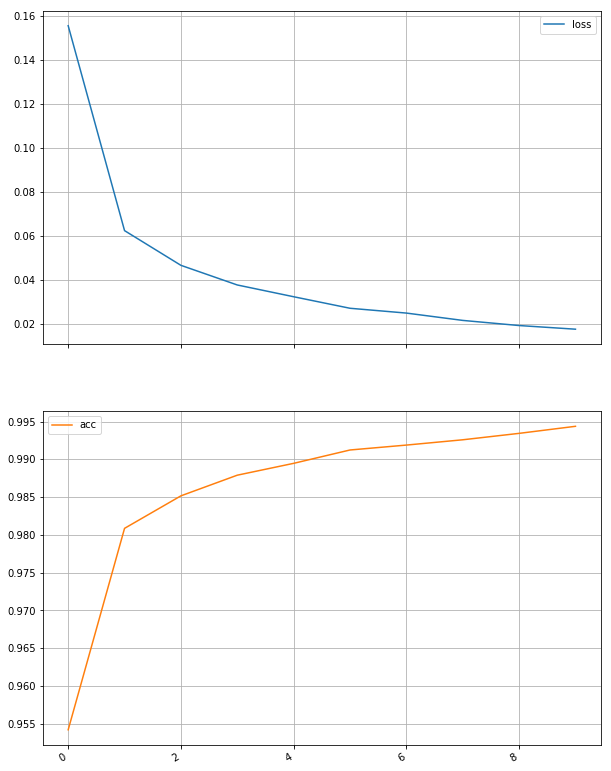

In [13]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history1.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

========UBID========
======manishre======
====personNumber====
======50289714======
Test Loss: 0.043812535471562296
Test Accuracy: 98.59


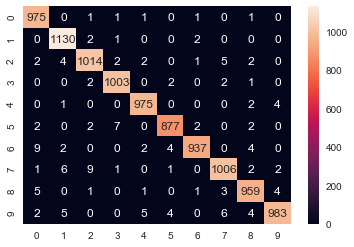

In [416]:
M_predict_CNN = model1.predict(CNNte_features)
M_conf_matrix_CNN = confusion_Matrix_NN(M_predict_CNN,testing_target) 
accuracy_CU = model1.evaluate(CNNte_features,testing_target,verbose=0)
print("========UBID========")
print("======manishre======")
print("====personNumber====")
print("======50289714======")
print("Test Loss:",accuracy_CU[0])
print("Test Accuracy:",accuracy_CU[1]*100)
import seaborn as sns; sns.set()
ax = sns.heatmap(M_conf_matrix_CNN.astype(int), annot=True,fmt="d")

## Random Forest

#### Data Preprocessing MNIST Dataset

In [244]:
Rt_features  = copy.deepcopy(T_features)
Rv_features  = copy.deepcopy(V_features)
Rte_features = copy.deepcopy(Te_features)
Rt_target  = copy.deepcopy(T_target)
Rv_target  = copy.deepcopy(V_target)
Rte_target = copy.deepcopy(Te_target)

#### Data Preprocessing of USPS Dataset

In [245]:
U_Rt_features = copy.deepcopy(U_feature)
U_Rt_target   = copy.deepcopy(U_Target)

#### Main Loop of MNIST Dataset

In [246]:
clf = RandomForestClassifier(n_estimators =100)
clf.fit(Rt_features, Rt_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Testing of Mnist Dataset using Random forest

In [247]:
RF_pred = clf.predict(Rte_features)
RF_acc  = metrics.accuracy_score(Rte_target,RF_pred)

####  Accuracy and Confusion Matrix for MNIST 

Accuracy: 96.84
Confusion Matrix for Random Forest:


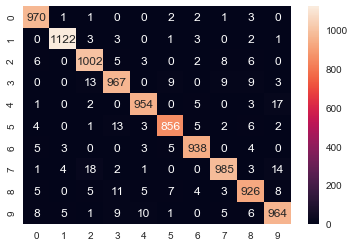

In [248]:
print("Accuracy:",RF_acc*100)
RFM_cm = confusion_matrix(Rte_target,RF_pred)
import seaborn as sns; sns.set()
print('Confusion Matrix for Random Forest:')
ax = sns.heatmap(RFM_cm.astype(int), annot=True,fmt="d")

#### Accuracy and Confusion Matrix for USPS 

In [251]:
RF_pred_U = clf.predict(U_Rt_features)
RF_acc_U  = metrics.accuracy_score(U_Rt_target,RF_pred_U)

Accuracy: 38.791939596979844
Confusion Matrix for Random Forest:


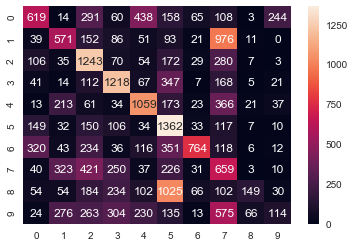

In [252]:
print("Accuracy:",RF_acc_U*100)
RFU_cm = confusion_matrix(U_Rt_target,RF_pred_U)
import seaborn as sns; sns.set()
print('Confusion Matrix for Random Forest:')
ax = sns.heatmap(RFU_cm.astype(int), annot=True,fmt="d")

### Support Vector Machine

In [259]:
from sklearn import svm
SVMt_features  = copy.deepcopy(T_features[:5000])
SVMv_features  = copy.deepcopy(V_features[:5000])
SVMte_features = copy.deepcopy(Te_features[:5000])
SVMt_target  = copy.deepcopy(T_target[:5000])
SVMv_target  = copy.deepcopy(V_target[:5000])
SVMte_target = copy.deepcopy(Te_target[:5000])

In [255]:
SVMU_features = copy.deepcopy(U_feature)
SVMU_target   = copy.deepcopy(U_Target)


In [256]:
print(SVMt_features.shape)
## there is linear polynomial guassian sigmoid

(5000, 784)


### SVM Linear

In [257]:
svclinear = SVC(kernel='linear')
svclinear.fit(SVMt_features,SVMt_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Accuracy and Confusion matrix for SVM Linear

Accuracy: 87.86
Confusion Matrix for SVM Linear:


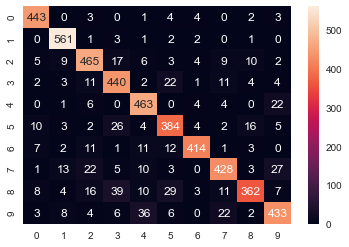

In [261]:
SVML_predict = svclinear.predict(SVMte_features) 
SVML_cm = confusion_matrix(SVMte_target, SVML_predict)  
SVM_accM = accuracy_score(SVMte_target,SVML_predict)
print("Accuracy:",SVM_accM*100)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM Linear:')
ax = sns.heatmap(SVML_cm.astype(int), annot=True,fmt="d")

Accuracy: 33.5766788339417
Confusion Matrix for SVM Linear:


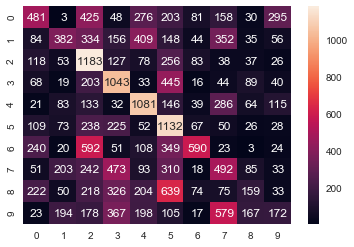

In [263]:
SVMU_predict = svclinear.predict(SVMU_features) 
SVML_cm_U = confusion_matrix(SVMU_target, SVMU_predict)  
SVM_accU = accuracy_score(SVMU_target,SVMU_predict)
print("Accuracy:",SVM_accU*100)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM Linear:')
ax = sns.heatmap(SVML_cm_U.astype(int), annot=True,fmt="d")

### SVM Radial with gamma =1

In [265]:
SVCG_M = SVC(kernel='rbf',gamma=1)  
SVCG_M.fit(SVMt_features, SVMt_target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Accuracy and Confusion Matrix for SVC radial kernel

Accuracy: 17.36
Confusion Matrix for SVM radial:


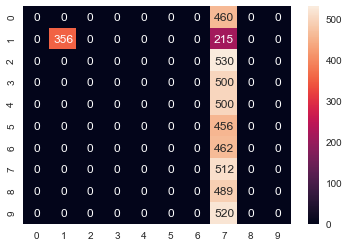

In [268]:
SVCGM_predict = SVCG_M.predict(SVMte_features) 
SVMGM_cm = confusion_matrix(SVMte_target, SVCGM_predict)  
SVMGM_acc = accuracy_score(SVMte_target,SVCGM_predict)
print("Accuracy:",SVMGM_acc*100)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM radial:')
ax = sns.heatmap(SVMGM_cm.astype(int), annot=True,fmt="d")

Accuracy: 10.000500025001251
Confusion Matrix for SVM Linear:


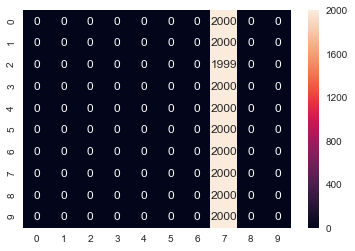

In [269]:
SVCGU_predict = SVCG_M.predict(SVMU_features) 
SVMGU_cm = confusion_matrix(SVMU_target, SVCGU_predict)  
SVMGU_acc = accuracy_score(SVMU_target,SVCGU_predict)
print("Accuracy:",SVMGU_acc*100)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM Linear:')
ax = sns.heatmap(SVMGU_cm.astype(int), annot=True,fmt="d")

### SVM Radial with gamma =auto

In [272]:
SVCG_MA = SVC(kernel='rbf')  
SVCG_MA.fit(T_features, T_target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Accuracy and Confusion Matrix of SVM Radial 

Accuracy: 94.35
Confusion Matrix for SVM radial:


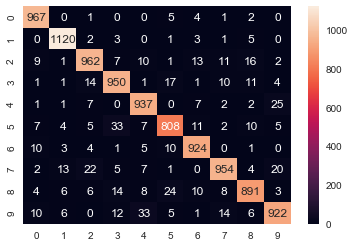

In [273]:
SVCGMA_predict = SVCG_MA.predict(Te_features) 
SVMGMA_cm = confusion_matrix(Te_target, SVCGMA_predict)  
SVMGMA_acc = accuracy_score(Te_target,SVCGMA_predict)
print("Accuracy:",SVMGMA_acc*100)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM radial:')
ax = sns.heatmap(SVMGMA_cm.astype(int), annot=True,fmt="d")


Accuracy: 38.54192709635482
Confusion Matrix for SVM Linear:


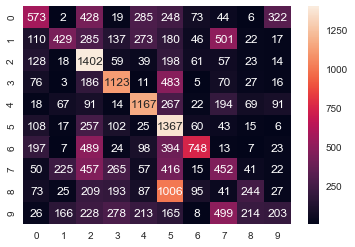

In [276]:
SVCGUA_predict = SVCG_MA.predict(SVMU_features) 
SVMGUA_cm = confusion_matrix(SVMU_target, SVCGUA_predict)  
SVMGUA_acc = accuracy_score(SVMU_target,SVCGUA_predict)
print("Accuracy:",SVMGUA_acc*100)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM Linear:')
ax = sns.heatmap(SVMGUA_cm.astype(int), annot=True,fmt="d")


#### Borda Count

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [81]:

model1 = LogisticRegression(random_state=1)
model2 = RandomForestClassifier(criterion='gini',random_state=None)
model3 = SVC(random_state=1)
model4 = MLPClassifier(random_state=1)
print('process started ..')
model = VotingClassifier(estimators=[('lr', model1), ('gini', model2),('rbf',model3),('lbfgs',model4)], voting='hard')
print('models intialized ..')
print('process fit started ......')
model.fit(T_features,T_target)
print('process fit finished')
model.score(Te_features,Te_target)

process started ..
models intialized ..
process fit started ......
process fit finished


A:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9558

In [137]:
U_Targetm=copy.deepcopy(USPSTar)
U_featurem=copy.deepcopy(USPSMat)

In [138]:
model.score(U_featurem,U_Targetm)

A:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.38931946597329864

## Ensemble

In [383]:
def Voting(predicted,wee):
    p_final =[]
    for i in range(predicted.shape[0]):
        v = np.zeros(10)
        for j in range (predicted.shape[1]):
            v[predicted[i][j]] += wee[j]
        #print(np.array(v))
        p_final.append(np.argmax(v))
    #print(p_final)
    return p_final
def decode_V(val):
    return np.argmax(val)
def Predict_o(predict_c):
    decode_p =[]
    for i in range(len(predict_c)):
        decode_p.append(decode_V(predict_c[i]))
    return decode_p  

In [434]:
VLM_p    = LRM_predictval
VLU_p    = LRU_predictval
VNM_p    = np.array(Predict_o(predict_NN))
VNU_p    = np.array(Predict_o(U_predict_NN))
VCN_p    = np.array(Predict_o(M_predict_CNN))
print(VCN_p.shape)
VRM_p    = RF_pred
VRU_p    = RF_pred_U 
VSM_p    = SVCGMA_predict
VSU_p    = SVCGUA_predict
##################################
predict_val = np.transpose(np.vstack([VLM_p,VNM_p,VRM_p,VSM_p,VCN_p]))
predict_Uval = np.transpose(np.vstack([VLU_p,VNU_p,VRU_p,VSU_p]))
predict_val = np.reshape(predict_val,(10000,5))
predict_Uval = np.reshape(predict_Uval,(19999,4))
print('combined predicted values of MNIST:',predict_val.shape)
print('combined predicted values of USPS :',predict_Uval.shape)
prob_M = [acc/100,accuracy_HC[1],RF_acc,SVMGMA_acc,accuracy_CU[1]] 
prob_m = (prob_M/max(prob_M))
prob_U = [U_acc/100,accuracy_U[1],RF_acc_U,SVMGUA_acc] 
prob_u = (prob_U/max(prob_U))

(10000,)
combined predicted values of MNIST: (10000, 5)
combined predicted values of USPS : (19999, 4)


In [435]:
print('Actual Acc:\n',prob_M)
print('Normalized Acc:\n',prob_m)
print('Actual Acc:\n',prob_U)
print('Normalized Acc:\n',prob_u)

Actual Acc:
 [0.9022, 0.9792, 0.9684, 0.9435, 0.9859]
Normalized Acc:
 [0.91510295 0.99320418 0.98224972 0.95699361 1.        ]
Actual Acc:
 [0.35736786839341966, 0.39441972098455913, 0.38791939596979846, 0.38541927096354817]
Normalized Acc:
 [0.90605984 1.         0.98351927 0.97718053]


#### Voting for Combined Models with MNIST DATASET

In [430]:
predicted_M = Voting(predict_val,prob_m)
print(len(predicted_M))
Vacc_M,VM_co,VM_wr,VM_confusion_mat = accuracy(predicted_M,Te_target)


10000
Starting Evaluation..


Accuracy of MNIST database: 97.44
Confusion Matrix for SVM Linear:


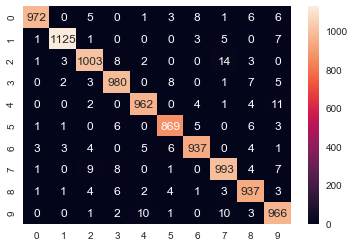

In [431]:
print('Accuracy of MNIST database:',Vacc_M)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM Linear:')
ax = sns.heatmap(VM_confusion_mat.astype(int), annot=True,fmt="d")

#### Voting for combined Models with USPS DATASET

In [437]:
print(predict_Uval.shape[0])
predicted_U = Voting(predict_Uval,prob_u)
Vacc_U,VU_co,VU_wr,VU_confusion_mat = accuracy(predicted_U,U_Target)

19999
Starting Evaluation..


Accuracy of USPS database: 41.34706735336767
Confusion Matrix for SVM Linear:


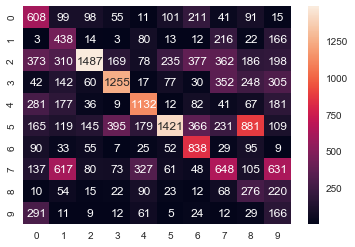

In [438]:
print('Accuracy of USPS database:',Vacc_U)
import seaborn as sns; sns.set()
print('Confusion Matrix for SVM Linear:')
ax = sns.heatmap(VU_confusion_mat.astype(int), annot=True,fmt="d")